# Introduction

In this artical we’re going to model the Bike Sharing Dataset, this process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C. USA.

# Exploring Bike Rental Dataset

## Background:


Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

  Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
  these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
  of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system       into
  a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
  events in the city could be detected via monitoring these data.


## Buisness case:
#### Rental services are paid, so as a rental service company, one of your concerns is customer satisfaction. Predicting bike rental demand helps adjust supply, especially if it can be done a few days in advance

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)

### Loading the data

In [3]:
data = pd.read_csv("hour.csv")
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Basic Checks

In [4]:
data.shape

(17379, 17)

In [5]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Domain Analysis

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month (1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are divided to 41 (max)
* atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

### Convertion of dteday to datetime

In [4]:
data["dteday"]=pd.to_datetime(data["dteday"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Bivariate Analysis 

In [10]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


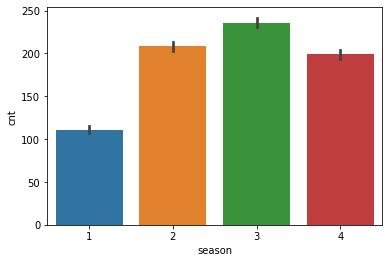

In [11]:
sns.barplot(x='season', y='cnt', data=data)
plt.show()

1. Impact of Season on Count
* During the fall season bike rental count is higher than other season
* During the spring season bike rental count is lower than other season

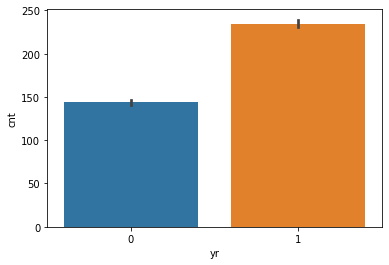

In [12]:
sns.barplot(x='yr', y ='cnt', data=data)
plt.show()

2. Impact of Year on Count
* As we know from domain analysis 0 is 2011 and 1 is 2012
* From the plot we came to know that the count of bike rental is higher in the year of 2012.

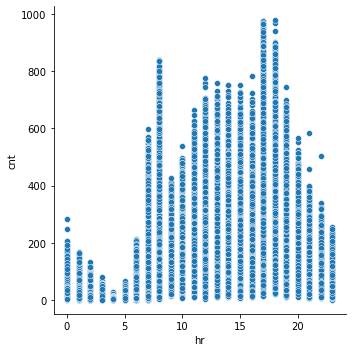

In [13]:
sns.relplot(x= 'hr', y='cnt', data=data)
plt.show()

3. Impact of Hour on Count
* From plot it is clear that bike rental is high from morning 8am to 8pm
* Specifically it is clear that evening 6pm to 7pm is the peak hour.

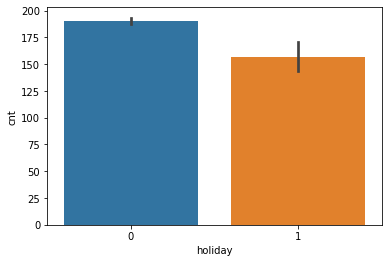

In [14]:
sns.barplot(x='holiday', y='cnt', data=data)
plt.show()

4. impact of Holiday on Count
* from the plot it is clear that bike rental count is high on holidays compared to working days

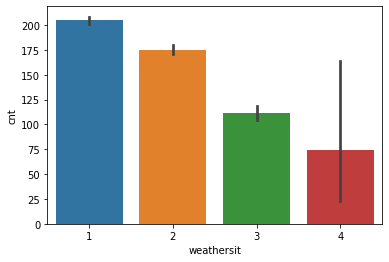

In [16]:
sns.barplot(x='weathersit', y='cnt', data=data)
plt.show()

5. Impact of weather condition on count
* During the clear sky the count of bike rental is more compared to other weather list

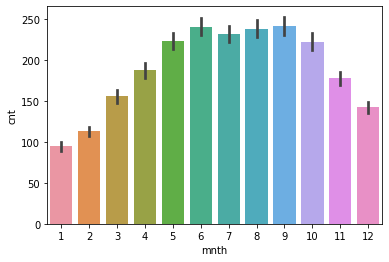

In [140]:
sns.barplot(x='mnth', y='cnt', data=data)
plt.show()

6. Impact of months on count
* from the plot it says that during the months of june to september the count of bike rental is more.

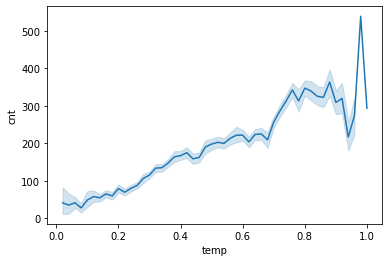

In [17]:
sns.lineplot(x='temp', y='cnt', data=data)
plt.show()

7. Impact of Temperature on count
* from the plot it says that more the temperature higher the bike rental.

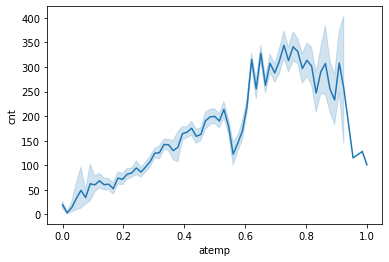

In [18]:
sns.lineplot(x='atemp', y='cnt', data=data)
plt.show()

8. imapct of Atmospheric temperature on count
* from plot it is clear that bike rental is more during the temperature of 30 to 40 degree celcius.

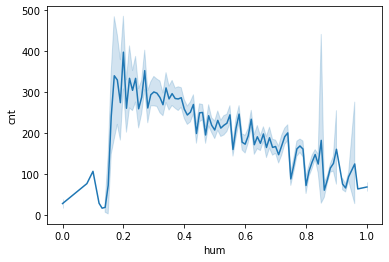

In [19]:
sns.lineplot(x='hum', y='cnt', data=data)
plt.show()

9. Impact of Humidity on count
* From the plot it is clear that as the humidity rate increases bike rental count decreases.

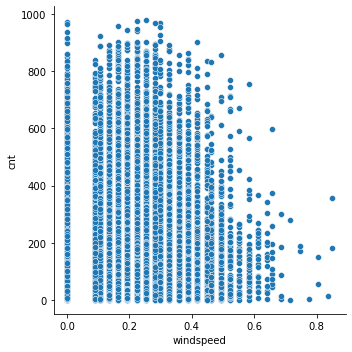

In [20]:
sns.relplot(x='windspeed', y='cnt', data=data)
plt.show()

10. Impact on windspeed on count
* As the windspeed increases bike rental count decreases

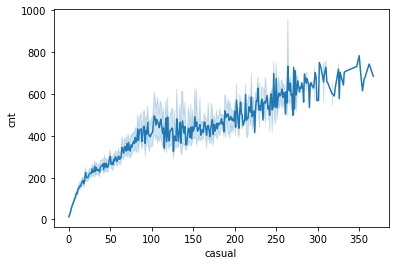

In [144]:
sns.lineplot(x='casual', y='cnt', data=data)
plt.show()

11. Impact of Casual users on Count
* from the plot is says that as the casual users increases the count of bike rental increases

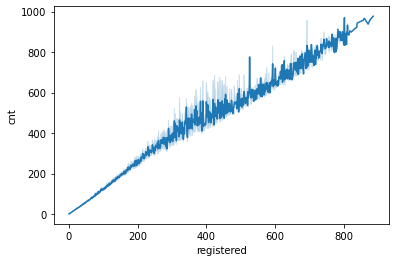

In [145]:
sns.lineplot(x='registered', y='cnt', data=data)
plt.show()

12. Impact of Registered users on Count
* from the plot is says that as the Registered users increases the count of bike rental increases

## Feature Engineering / Data Preprocessing

### Missing Values Handling

In [24]:
data.isnull()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

* This data has no missing values

### Outlier Handling

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

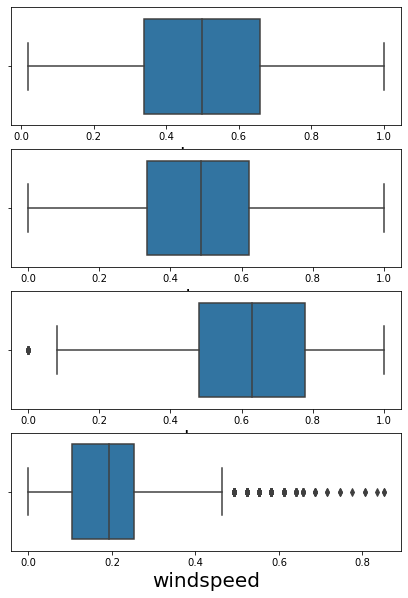

In [29]:
box = data[['temp','atemp', 'hum', 'windspeed']]
plt.figure(figsize=(7,10), facecolor='white')
plotnumber=1

for column in box:
    if plotnumber<=4:
        ax=plt.subplot(4,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [35]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
data.loc[:,['temp','atemp', 'hum', 'windspeed']]= sc.fit_transform(data.loc[:,['temp','atemp', 'hum', 'windspeed']])

In [37]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,-1.334648,-1.093281,0.947372,-1.553889,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,0,1,1


 # Feature Selection

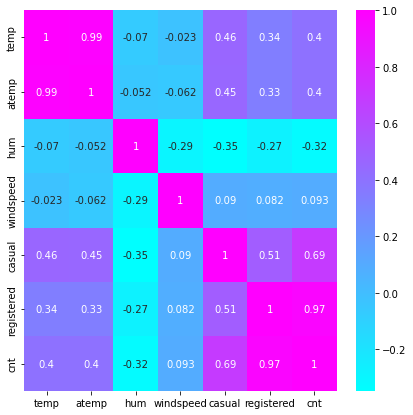

In [38]:
data_corr = data[['temp','atemp', 'hum', 'windspeed','casual','registered', 'cnt']]
plt.figure(figsize=(7,7))
sns.heatmap(data_corr.corr(), annot=True, cmap='cool')
plt.show()

## Data Preprocessing

In [79]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,-1.334648,-1.093281,0.947372,-1.553889,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,0,1,1


In [7]:
#categorical attributes
cat_attributes=['season','holiday','workingday','weathersit','yr']
#numerical attributes
num_attributes=['temp','windspeed','hum','mnth','weekday']

## One Hot Encoding

In [8]:
encoded_data =pd.get_dummies(data,columns=cat_attributes)
print('Shape of transfomed dataframe::',encoded_data.shape)
encoded_data.head()

Shape of transfomed dataframe:: (17379, 26)


,instant,dteday,mnth,hr,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,yr_0,yr_1
0,1,2011-01-01,1,0,6,-1.334648,-1.093281,0.947372,-1.553889,3,13,16,1,0,0,0,1,0,1,0,1,0,0,0,1,0
1,2,2011-01-01,1,1,6,-1.438516,-1.181732,0.895539,-1.553889,8,32,40,1,0,0,0,1,0,1,0,1,0,0,0,1,0
2,3,2011-01-01,1,2,6,-1.438516,-1.181732,0.895539,-1.553889,5,27,32,1,0,0,0,1,0,1,0,1,0,0,0,1,0
3,4,2011-01-01,1,3,6,-1.334648,-1.093281,0.636370,-1.553889,3,10,13,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,5,2011-01-01,1,4,6,-1.334648,-1.093281,0.636370,-1.553889,0,1,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0


In [10]:
x= encoded_data.iloc[:,0:-1] ## Independent Features
y= encoded_data.iloc[:,-1] ## Dependent Varibales

# Linear Regression

## Model Building

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [16]:
X = data.drop(['atemp', 'registered','dteday', 'instant','windspeed'], axis=1)
y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [110]:
X_test

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,casual,cnt
12830,3,1,6,19,0,6,0,1,1.573679,-1.851653,185,425
8688,1,1,1,20,1,1,0,1,-1.334648,-1.125980,5,88
7091,4,0,10,2,0,5,1,1,-0.919172,0.169865,1,4
12230,2,1,5,19,0,2,1,1,1.469810,-0.555808,69,526
431,1,0,1,0,0,4,1,1,-1.230779,-0.348473,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...
12749,2,1,6,10,0,3,1,1,1.677548,-0.555808,41,167
11476,2,1,4,9,0,6,0,2,-0.607566,-1.333315,45,214
12847,3,1,6,12,0,0,0,1,1.573679,-1.540650,227,556
16721,4,1,12,12,0,2,1,1,0.119516,0.273533,39,312


In [111]:
X_train

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,casual,cnt
11229,2,1,4,2,0,3,1,2,0.015647,-1.074146,1,9
6334,4,0,9,12,0,1,1,2,0.950466,0.843705,48,209
11060,2,1,4,0,0,3,1,1,-0.815304,-1.385149,8,30
12346,2,1,6,15,0,0,0,1,1.054335,-1.488816,236,644
15437,4,1,10,10,0,3,1,1,0.327253,-0.555808,27,217
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2,1,4,9,0,5,1,1,-0.192091,1.310209,30,359
11964,2,1,5,17,0,5,1,1,0.846597,-1.488816,124,812
5390,3,0,8,12,0,3,1,1,1.573679,-1.022312,26,189
860,1,0,2,7,0,2,1,1,-1.334648,0.118032,3,100


In [112]:
y_test

12830    425
8688      88
7091       4
12230    526
431       13
        ... 
12749    167
11476    214
12847    556
16721    312
9511      72
Name: cnt, Length: 5214, dtype: int64

In [113]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)

LinearRegression()

In [114]:
X_train

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,casual,cnt
11229,2,1,4,2,0,3,1,2,0.015647,-1.074146,1,9
6334,4,0,9,12,0,1,1,2,0.950466,0.843705,48,209
11060,2,1,4,0,0,3,1,1,-0.815304,-1.385149,8,30
12346,2,1,6,15,0,0,0,1,1.054335,-1.488816,236,644
15437,4,1,10,10,0,3,1,1,0.327253,-0.555808,27,217
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2,1,4,9,0,5,1,1,-0.192091,1.310209,30,359
11964,2,1,5,17,0,5,1,1,0.846597,-1.488816,124,812
5390,3,0,8,12,0,3,1,1,1.573679,-1.022312,26,189
860,1,0,2,7,0,2,1,1,-1.334648,0.118032,3,100


In [115]:
X_train.shape

(12165, 12)

In [116]:
y_train.shape

(12165,)

In [117]:
Lin_reg.intercept_

1.7053025658242404e-13

In [118]:
Lin_reg.coef_

array([-9.72765814e-15, -1.16665724e-13, -2.43725673e-15,  1.42040405e-15,
       -5.03064510e-16,  2.43641672e-15,  6.78689726e-14, -1.65212745e-14,
       -5.11593726e-14,  1.73722483e-14,  1.93267809e-15,  1.00000000e+00])

## Model Evaluation

In [119]:
from sklearn.metrics import r2_score

In [120]:
# Evaluating on training data

y_train_predict = Lin_reg.predict(X_train)

train_score = r2_score(y_train,y_train_predict)
train_score

1.0

In [121]:
X_train.shape

(12165, 12)

In [122]:
y_train_predict.shape

(12165,)

In [123]:
# Checking for adjusted r2 score

train_adjusted_r2 = 1-(1-1.0)*(13903-1)/(13903-14-1)
train_adjusted_r2

1.0

In [124]:
y_test_predict = Lin_reg.predict(X_test)

test_score = r2_score(y_test,y_test_predict)
test_score

1.0

In [125]:
X_test.shape

(5214, 12)

In [126]:
import math

In [127]:
print(mean_squared_error(y_test,y_test_predict))
print(math.sqrt(mean_squared_error(y_test,y_test_predict))) 

2.9993374697417434e-26
1.731859540996828e-13


In [128]:
print(mean_absolute_error(y_test,y_test_predict))

1.3095734274089242e-13


# Decision Tree

## Model Building

In [17]:
from sklearn.model_selection import train_test_split  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_hat=dt.predict(X_test)    

## Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
## Training score
train_predict=dt.predict(X_train)
cc_train=accuracy_score(y_train,train_predict)
cc_train  

1.0

In [20]:
print(classification_report(y_train,train_predict))   

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       157
           3       1.00      1.00      1.00       155
           4       1.00      1.00      1.00       173
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       169
           7       1.00      1.00      1.00       151
           8       1.00      1.00      1.00       134
           9       1.00      1.00      1.00        98
          10       1.00      1.00      1.00       121
          11       1.00      1.00      1.00       117
          12       1.00      1.00      1.00       102
          13       1.00      1.00      1.00        85
          14       1.00      1.00      1.00        73
          15       1.00      1.00      1.00        70
          16       1.00      1.00      1.00        84
          17       1.00      1.00      1.00        84
          18       1.00    

In [21]:
y_hat=dt.predict(X_test)

In [22]:
print(classification_report(y_test,y_hat)) 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        58
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00        47
           8       1.00      1.00      1.00        48
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        21
          17       1.00      1.00      1.00        18
          18       1.00    

# Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
rf=RandomForestRegressor(n_estimators=200)

In [131]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [132]:
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9999997822284818


In [133]:
rf_pred=rf.predict(X_test)

In [135]:
from sklearn import preprocessing,metrics,linear_model

In [136]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 0.21787445886003282
Mean absolute error : 0.027189298043727668


# Summary:

In our pursuit to find the best predictive model to help us assess the rental needs on a hourly basis, we have tested 3 models.We have found that for this problem, the Random Forrest regressor is the best option among Linear Regression and Decision Tree.

## Conclusion:

### To conclude, if we are to ensure customer satisfaction by having a bike available when they need it, the Random Forrest model would be our best option.